**Problem statement**:

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [72]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import load_img
from glob import glob

In [21]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [22]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [23]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2242
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [24]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [25]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    crop_to_aspect_ratio=False
)

Found 2242 files belonging to 9 classes.
Using 1794 files for training.


In [26]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    crop_to_aspect_ratio=False
)

Found 2242 files belonging to 9 classes.
Using 448 files for validation.


In [27]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

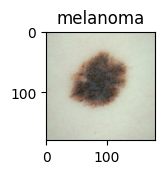

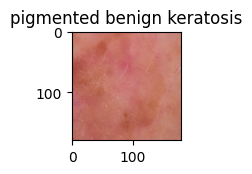

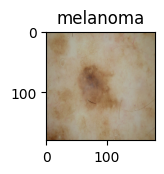

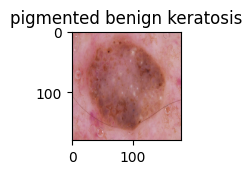

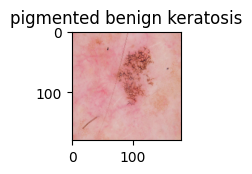

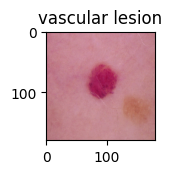

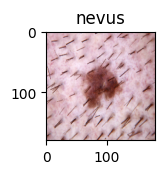

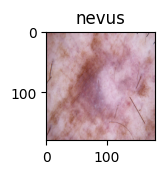

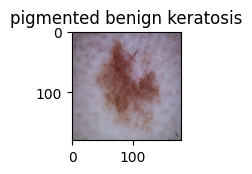

In [19]:
import matplotlib.pyplot as plt


### your code goes here, you can use training or validation data to visualize
for images, labels in train_ds.take(1):
  for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.show()


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [28]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [34]:
### Your code goes here
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(180, 180, 32)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(9))
model.add(Activation('softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [35]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
# View the summary of all layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 activation_22 (Activation)  (None, 180, 180, 32)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 178, 178, 32)      9248      
                                                                 
 activation_23 (Activation)  (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                      

### Train the model

In [37]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 8s 86ms/step - loss: 2.0561 - accuracy: 0.1929 - val_loss: 2.0289 - val_accuracy: 0.1540
Epoch 2/20
57/57 [==============================] - 4s 73ms/step - loss: 2.0289 - accuracy: 0.2079 - val_loss: 2.0306 - val_accuracy: 0.1875
Epoch 3/20
57/57 [==============================] - 4s 73ms/step - loss: 2.0139 - accuracy: 0.2118 - val_loss: 2.0418 - val_accuracy: 0.2165
Epoch 4/20
57/57 [==============================] - 4s 74ms/step - loss: 2.0090 - accuracy: 0.2425 - val_loss: 2.0034 - val_accuracy: 0.1875
Epoch 5/20
57/57 [==============================] - 4s 74ms/step - loss: 1.9788 - accuracy: 0.2765 - val_loss: 1.9768 - val_accuracy: 0.2946
Epoch 6/20
57/57 [==============================] - 4s 74ms/step - loss: 1.9412 - accuracy: 0.2921 - val_loss: 1.9157 - val_accuracy: 0.2835
Epoch 7/20
57/57 [==============================] - 4s 74ms/step - loss: 1.9065 - accuracy: 0.3055 - val_loss: 1.8796 - val_accuracy: 0.2902
Epoch 8/20
57

### Visualizing training results

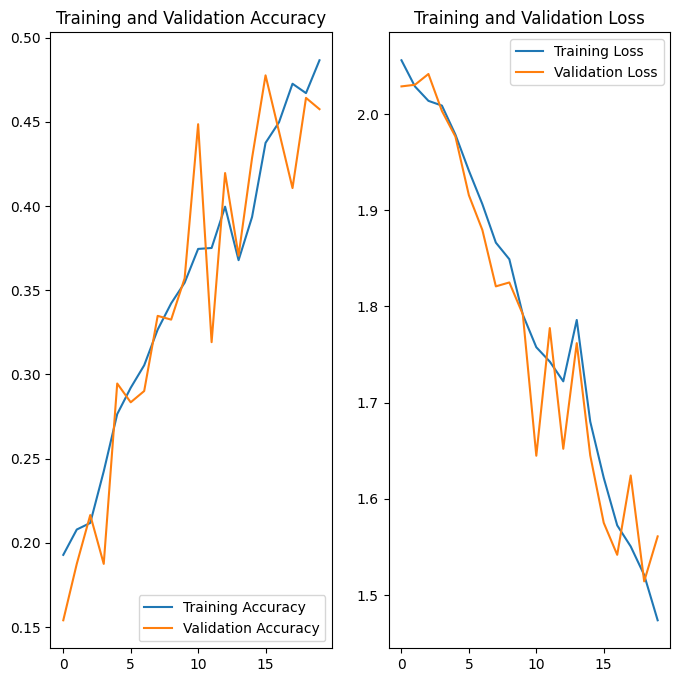

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

The model built is very initial model with mo dropouts or batch normalization. Training and validation losses have been going down as the number of epochs increased. There isnt much difference in training and validation accuracy and both training and validation accuracy is low which suggests that model is underfitting and needs improvement.


In [39]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

data_augmentation = keras.Sequential([layers.RandomFlip("horizontal_and_vertical"),
                                      layers.RandomRotation(0.4),
                                      layers.RandomZoom(0.4),
                                      layers.RandomContrast(0.1)
                                    ])

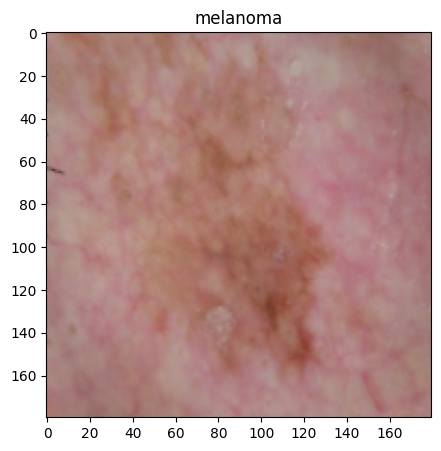

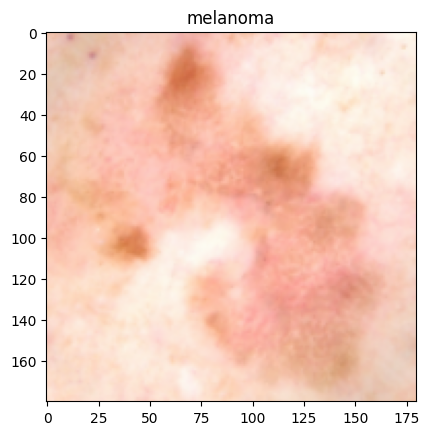

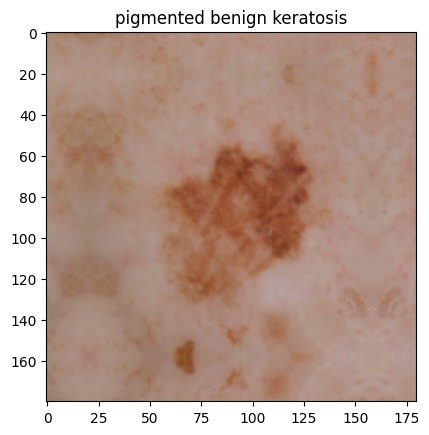

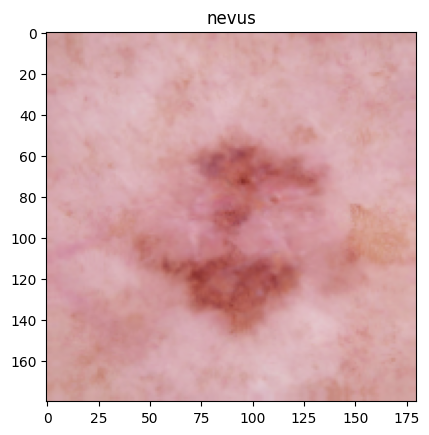

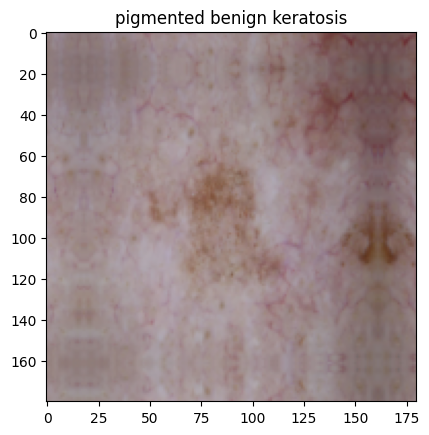

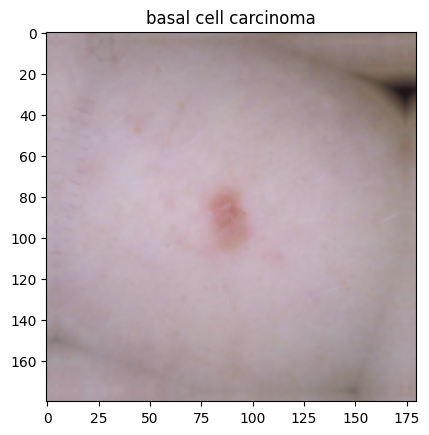

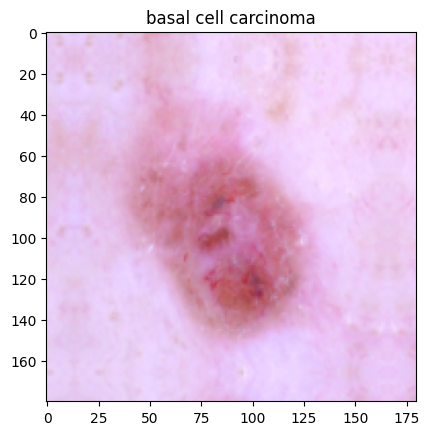

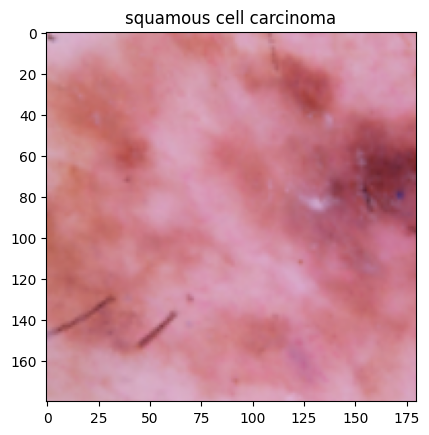

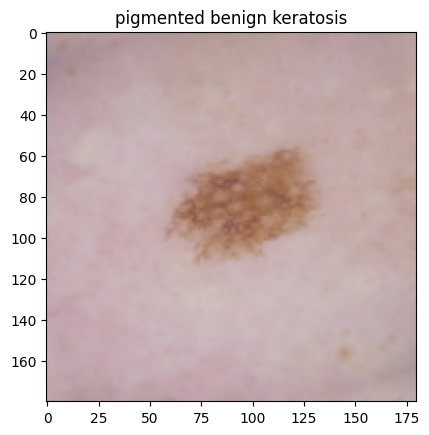

In [28]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1):
  for i in range(9):
    plt.imshow(data_augmentation(images)[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.show()

### Todo:
### Create the model, compile and train the model


In [54]:
from keras import regularizers
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model.add(Conv2D(16, (3, 3), padding='same',input_shape=(180, 180, 32)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l1_l2(l1=0, l2=0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(9))
model.add(Activation('softmax'))

### Compiling the model

In [55]:
## Your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

### Training the model

In [56]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 9s 112ms/step - loss: 8.4456 - accuracy: 0.2363 - val_loss: 3.5978 - val_accuracy: 0.2031
Epoch 2/20
57/57 [==============================] - 6s 108ms/step - loss: 2.5052 - accuracy: 0.3244 - val_loss: 2.4200 - val_accuracy: 0.2277
Epoch 3/20
57/57 [==============================] - 6s 109ms/step - loss: 1.9377 - accuracy: 0.3774 - val_loss: 2.1440 - val_accuracy: 0.1964
Epoch 4/20
57/57 [==============================] - 6s 110ms/step - loss: 1.7669 - accuracy: 0.4208 - val_loss: 2.2461 - val_accuracy: 0.2879
Epoch 5/20
57/57 [==============================] - 6s 110ms/step - loss: 1.7693 - accuracy: 0.4409 - val_loss: 2.1391 - val_accuracy: 0.3750
Epoch 6/20
57/57 [==============================] - 6s 110ms/step - loss: 1.7363 - accuracy: 0.4470 - val_loss: 2.1193 - val_accuracy: 0.3750
Epoch 7/20
57/57 [==============================] - 6s 109ms/step - loss: 1.6985 - accuracy: 0.4877 - val_loss: 2.0693 - val_accuracy: 0.4487
Epoch 

### Visualizing the results

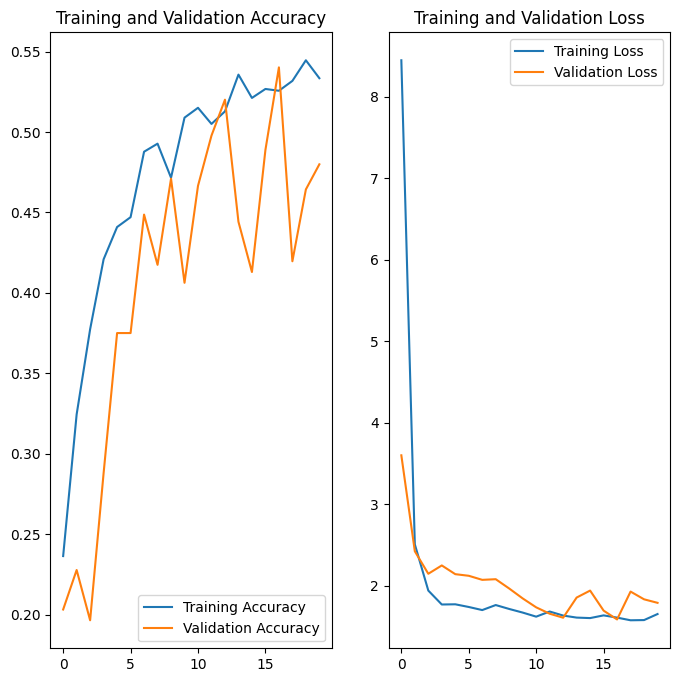

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### After data augmenting the model seems to be a good model. There isnt much different between training and validation accuracies and training and validation loss both. However, the accuracy is stil low which suggests the areas of improvement in terms of class imbalance.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [67]:
## Your code goes here.
def file_count(directory):
  count = []
  for path in pathlib.Path(directory).iterdir():
          if path.is_dir():
              count.append(len([name for name in os.listdir(path)
                                if os.path.isfile(os.path.join(path, name))]))

      #name of the classes
  sub_folder = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]

      #return dataframe with image count and class.
  return pd.DataFrame(list(zip(sub_folder,count)),columns =['Class', 'Image_Count'])

df = file_count(data_dir_train)
df.sort_values(by='Image_Count', ascending=False)

,Class,Image_Count
4,pigmented benign keratosis,462
1,melanoma,438
6,basal cell carcinoma,379
0,nevus,357
7,squamous cell carcinoma,181
2,vascular lesion,139
3,actinic keratosis,114
5,dermatofibroma,95
8,seborrheic keratosis,77


<Axes: xlabel='Class'>

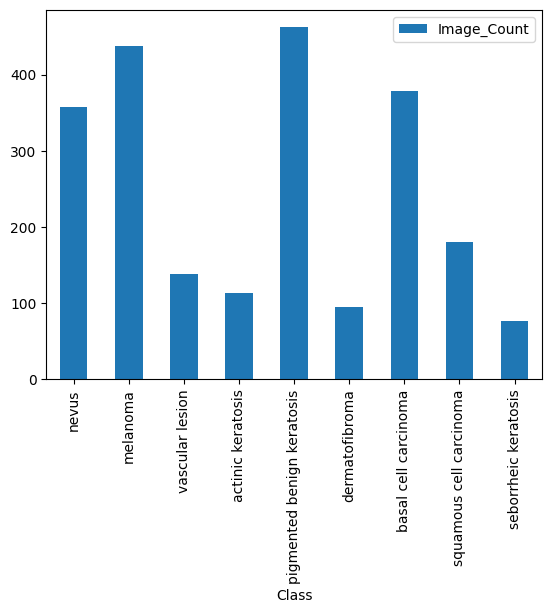

In [63]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter

df.plot(kind = 'bar', x='Class', y='Image_Count')

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?

**seborrheic keratosis**	has the lowest count
#### - Which classes dominate the data in terms proportionate number of samples?

**pigmented benign keratosis**	 has the higest count of all the classes.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [69]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [70]:
path_to_training_dataset="/content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B4326CFBAF0>: 100%|██████████| 500/500 [00:05<00:00, 95.74 Samples/s]


Initialised with 379 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B4326CFB0A0>: 100%|██████████| 500/500 [00:06<00:00, 75.15 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B4326B56BF0>: 100%|██████████| 500/500 [00:05<00:00, 90.65 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7B4326DD79A0>: 100%|██████████| 500/500 [00:21<00:00, 23.28 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7B447014A380>: 100%|██████████| 500/500 [00:18<00:00, 27.47 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B447014A380>: 100%|██████████| 500/500 [00:05<00:00, 88.04 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7B4326CC7790>: 100%|██████████| 500/500 [00:09<00:00, 55.35 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7B4326B7D2D0>: 100%|██████████| 500/500 [00:05<00:00, 90.46 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B4326BBE980>: 100%|██████████| 500/500 [00:05<00:00, 94.46 Samples/s]


In [19]:
# import shutil
# for i in class_names:
#   path = path_to_training_dataset+ i + '/output'
#   print(path)
#   shutil.rmtree(path)

/content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output
/content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output
/content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output
/content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output
/content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output
/content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output
/content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output
/content/gdrive/MyDrive/Upgrad/CNN_a

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [37]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [38]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2242

In [39]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/Upgrad/CNN_assignment/...,nevus
1,/content/gdrive/MyDrive/Upgrad/CNN_assignment/...,nevus
2,/content/gdrive/MyDrive/Upgrad/CNN_assignment/...,nevus
3,/content/gdrive/MyDrive/Upgrad/CNN_assignment/...,nevus
4,/content/gdrive/MyDrive/Upgrad/CNN_assignment/...,nevus
...,...,...
2237,/content/gdrive/MyDrive/Upgrad/CNN_assignment/...,seborrheic keratosis
2238,/content/gdrive/MyDrive/Upgrad/CNN_assignment/...,seborrheic keratosis
2239,/content/gdrive/MyDrive/Upgrad/CNN_assignment/...,seborrheic keratosis
2240,/content/gdrive/MyDrive/Upgrad/CNN_assignment/...,seborrheic keratosis


### Lets see the distribution of augmented data after adding new images to the original training data.

In [40]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000223.jpg_3642d0be-6937-42b7-bbaa-9a80dba2b13f.jpg',
 '/content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000263.jpg_bcc2dd2b-bae9-4e9b-b17b-9c1c1a537983.jpg',
 '/content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0026575.jpg_2f74788f-2ce6-4f97-92a5-f44a51745d51.jpg',
 '/content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0028820.jpg_99051d62-84ed-46a8-bd7e-22e19a0721b1.jpg',
 '/content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0026848.jpg_07336eab-0e82-4910-ae29

In [41]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000223.jpg_3642d0be-6937-42b7-bbaa-9a80dba2b13f.jpg',
 '/content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000263.jpg_bcc2dd2b-bae9-4e9b-b17b-9c1c1a537983.jpg',
 '/content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0026575.jpg_2f74788f-2ce6-4f97-92a5-f44a51745d51.jpg',
 '/content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0028820.jpg_99051d62-84ed-46a8-bd7e-22e19a0721b1.jpg',
 '/content/gdrive/MyDrive/Upgrad/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0026848.jpg_07336eab-0e82-4910-ae29

In [42]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',


In [43]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [44]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df._append(df2)

In [45]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          879
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [46]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [47]:
# data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6742 files belonging to 9 classes.
Using 5394 files for training.


#### **Todo:** Create a validation dataset

In [48]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6742 files belonging to 9 classes.
Using 1348 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [13]:
## your code goes here
from keras import regularizers
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model.add(Conv2D(16, (3, 3), padding='same',input_shape=(180, 180, 32)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l1_l2(l1=0, l2=0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(9))
model.add(Activation('softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [14]:
## your code goes here
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

# # define the learning rate change
# def exp_decay(epoch):
#     lrate = learning_rate * np.exp(-decay_rate*epoch)
#     return lrate

# # learning schedule callback
# loss_history = History()
# lr_rate = LearningRateScheduler(exp_decay)
# callbacks_list = [loss_history, lr_rate]


optimizer = Adam( learning_rate=0.001)#, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [15]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 10s 42ms/step - loss: 2.9472 - accuracy: 0.3330 - val_loss: 2.3598 - val_accuracy: 0.1091
Epoch 2/30
169/169 [==============================] - 6s 38ms/step - loss: 1.6690 - accuracy: 0.4066 - val_loss: 2.0709 - val_accuracy: 0.2760
Epoch 3/30
169/169 [==============================] - 6s 37ms/step - loss: 1.6140 - accuracy: 0.4357 - val_loss: 1.6590 - val_accuracy: 0.4473
Epoch 4/30
169/169 [==============================] - 6s 38ms/step - loss: 1.5882 - accuracy: 0.4659 - val_loss: 1.5955 - val_accuracy: 0.4881
Epoch 5/30
169/169 [==============================] - 6s 38ms/step - loss: 1.5930 - accuracy: 0.4755 - val_loss: 1.5915 - val_accuracy: 0.4941
Epoch 6/30
169/169 [==============================] - 6s 38ms/step - loss: 1.5399 - accuracy: 0.5195 - val_loss: 1.7240 - val_accuracy: 0.4822
Epoch 7/30
169/169 [==============================] - 6s 38ms/step - loss: 1.5645 - accuracy: 0.5463 - val_loss: 1.6707 - val_accuracy: 0.536

#### **Todo:**  Visualize the model results

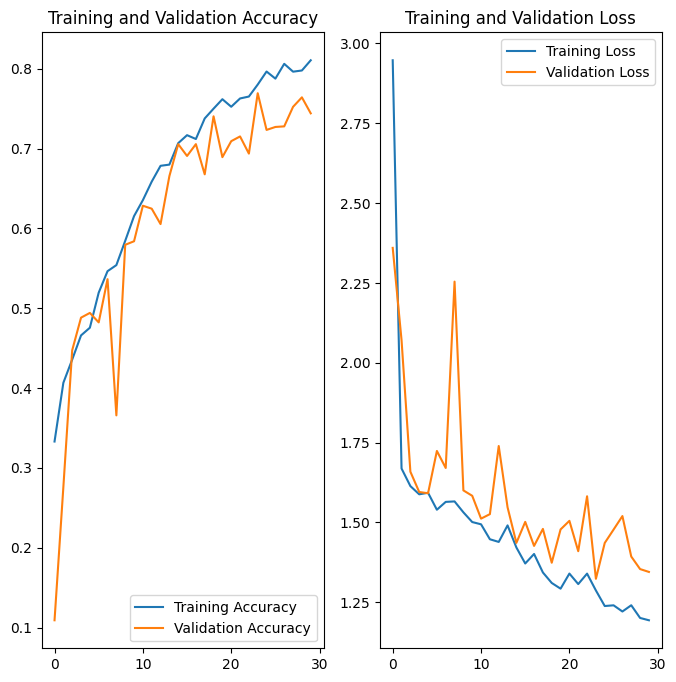

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

**Class rebalance surely helped** as it prevented model from being baised towards a certain set of classes. Along with class rebanace, ffter tweaking hyperparamaters and model architecture by adding one more Convoluational layer, model accuracy significantly increased. As the epochs proceeded, there hasn been lesser difference in training and testing accuracies.



1/1 [==============================] - 1s 715ms/step
Actual Class basal cell carcinoma
Predictive Class basal cell carcinoma


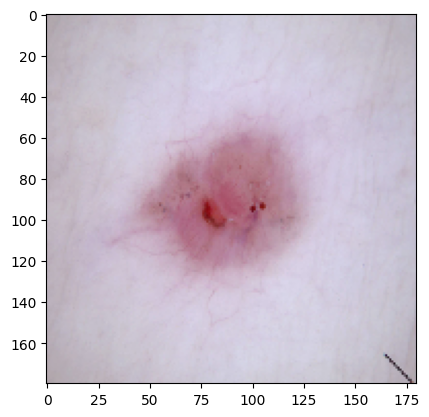

In [71]:
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[1] +'\n'+ "Predictive Class "+pred_class )

In [77]:
!pip show keras

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow
